In [59]:
import requests
import pandas as pd
import numpy as np
from io import StringIO

# URL of the CSV file
url = 'https://gist.githubusercontent.com/ic1y/ac0987725ee078886fd6b08717b045d0/raw/87e810a7182a553cf17e6479b92938f878a464ab/games.csv'

# Make a GET request to fetch the data
response = requests.get(url)

df = None

# Check if the request was successful
if response.status_code == 200:
    # Read the content of the response into a pandas DataFrame
    csv_data = StringIO(response.text)
    df = pd.read_csv(csv_data)
    df
    for index, row in df.iterrows():
        if row["Median Playtime"] == 0:
            df = df.drop(index=index, axis="index")
    print(df.columns.tolist())
    df.to_csv("new_games.csv")

else:
    print('Failed to retrieve data. Status code:', response.status_code)


['AppID', 'Name', 'Game Type', 'Developers', 'Publishers', 'Positive Reviews', 'Negative Reviews', 'Median Owners', 'Average Playtime', 'Median Playtime', 'CCU', 'Price', 'Initial Price', 'Discount']


In [79]:


aaa_data = df[df['Game Type'] == 'AAA']
indie_data = df[df['Game Type'] == 'Indie']

both_data = df.groupby("Game Type")

median_playtime = indie_data["Median Playtime"]

x = np.linspace(median_playtime.mean() - 3*median_playtime.std(), median_playtime.mean() + 3*median_playtime.std(), 100)
y = 1/(median_playtime.std() * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - median_playtime.mean()) / median_playtime.std()) ** 2)

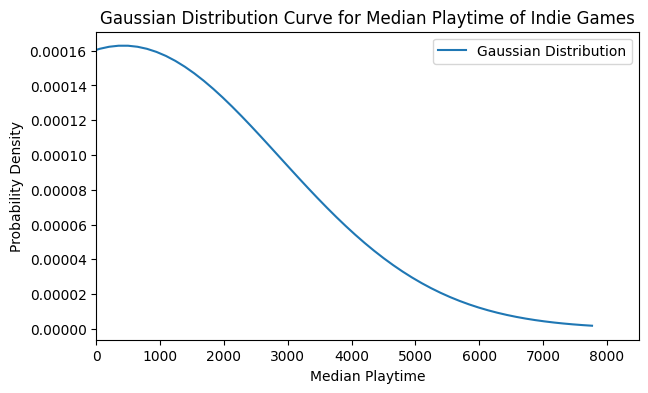

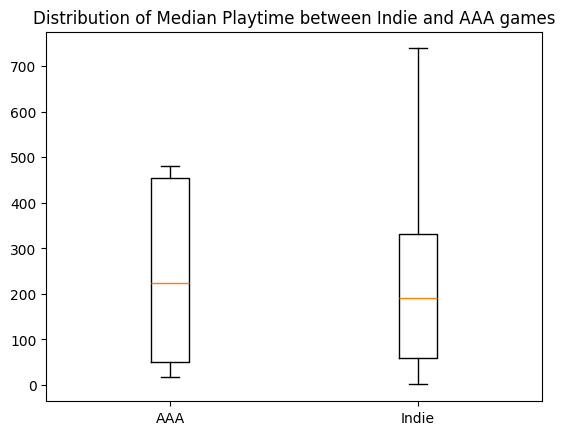

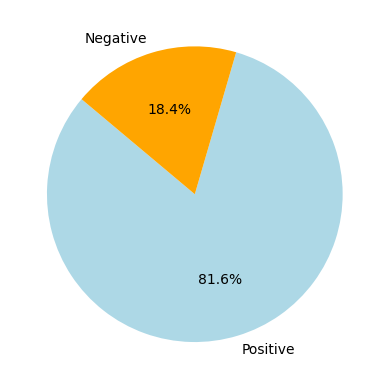

In [82]:
import matplotlib.pyplot as plt

# Create a box plot to compare the distribution of median playtime between AAA and indie games
plt.figure(figsize=(7, 4))
#plt.boxplot([aaa_data.agg({ "Median Playtime": ["mean"] }).mean(), indie_data.agg({ "Median Playtime": ["mean"] }).mean()], labels=['AAA', 'Indie'], showfliers=False)
#plt.hist(aaa_data["Median Playtime"], bins=10, color='skyblue', edgecolor='black')
# Plot the Gaussian distribution curve
plt.plot(x, y, label='Gaussian Distribution')
plt.xlim(left=0)
# Add labels and legend
plt.xlabel('Median Playtime')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution Curve for Median Playtime of Indie Games')
plt.legend()
plt.show()


plt.boxplot([aaa_data["Median Playtime"], indie_data["Median Playtime"]], labels=['AAA', 'Indie'], showfliers=False)
plt.title('Distribution of Median Playtime between Indie and AAA games')
plt.show()

plt.pie(
    [aaa_data["Positive Reviews"].sum(), aaa_data["Negative Reviews"].sum()],
    labels=["Positive", "Negative"],
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightblue', 'orange']
)
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

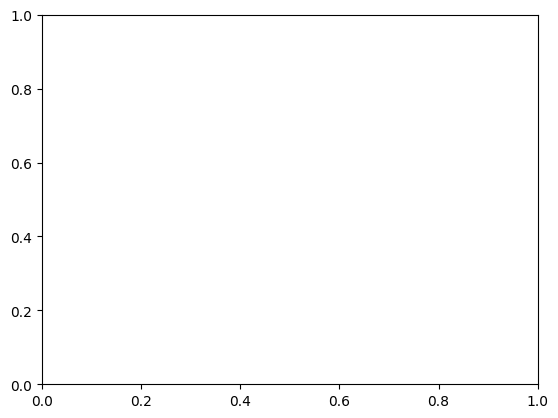

In [76]:
plt.pie([aaa_data], labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])